비지도학습(Unsupervised Learning)은 머신러닝의 한 분류로서, 데이터가 어떻게 구성되어 있는지 알아내고 싶을 때, 사용  
지도학습과 달리 타겟값(클래스, 레이블,...)이 없음

* 차원 축소 : PCA, LDA, SVD
* 군집화(Clustering) : KMeans Clustering, DBScan
* 군집화 평가(실루엣)

### 차원 축소
* 차원 = 피처의 갯수
* 차원 축소는 피처의 갯수를 줄이는 것
* 단순 제거의 개념이 아니라 특징을 추출하는 역할
* 계산 비용 감소 효과

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.decomposition import PCA

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
data = iris['data']
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [8]:
df = pd.DataFrame(data, columns=iris['feature_names'])
df['target'] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### PCA
* Principal Component Analysis : 주성분분석
* 선형 차원 축소 기법
* 분산(variance)을 최대한 보존
* n_components 1보다 작으면 분산을 기준으로 축소
* 1보다 크면 해당 값을 기준으로 피처 축소

In [14]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('target',1))

In [12]:
pca_data

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

In [13]:
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(df.drop('target',1))
pca_data

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

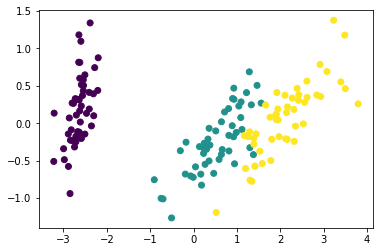

In [16]:
# n_components=2
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['target'])

In [17]:
pca = PCA(n_components=0.99)
pca_data = pca.fit_transform(df.drop('target',1))
pca_data

array([[-2.68412563,  0.31939725, -0.02791483],
       [-2.71414169, -0.17700123, -0.21046427],
       [-2.88899057, -0.14494943,  0.01790026],
       [-2.74534286, -0.31829898,  0.03155937],
       [-2.72871654,  0.32675451,  0.09007924],
       [-2.28085963,  0.74133045,  0.16867766],
       [-2.82053775, -0.08946138,  0.25789216],
       [-2.62614497,  0.16338496, -0.02187932],
       [-2.88638273, -0.57831175,  0.02075957],
       [-2.6727558 , -0.11377425, -0.19763272],
       [-2.50694709,  0.6450689 , -0.07531801],
       [-2.61275523,  0.01472994,  0.10215026],
       [-2.78610927, -0.235112  , -0.20684443],
       [-3.22380374, -0.51139459,  0.06129967],
       [-2.64475039,  1.17876464, -0.15162752],
       [-2.38603903,  1.33806233,  0.2777769 ],
       [-2.62352788,  0.81067951,  0.13818323],
       [-2.64829671,  0.31184914,  0.02666832],
       [-2.19982032,  0.87283904, -0.12030552],
       [-2.5879864 ,  0.51356031,  0.21366517],
       [-2.31025622,  0.39134594, -0.239

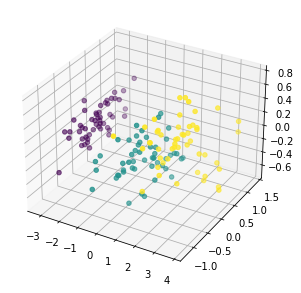

In [18]:
# n_components=0.99
# 3d
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(pca_data[:,0], pca_data[:,1], pca_data[:,2], c=df['target'])

### LDA
* Linear Discriminant Analysis : 선형 판별 분석
* PCA 유사
* 클래스 분리를 최대화하는 축을 찾기 위해 클래스간의 분산과 분산의 비율을 최대화하는 방식으로 차원 축소

In [19]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)
lda_data = lda.fit_transform(df, df['target'])
lda_data

array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

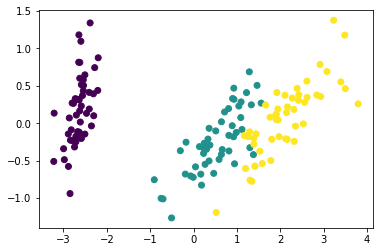

In [20]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(df.drop('target',1))
plt.scatter(pca_data[:,0], pca_data[:,1], c=df['target'])

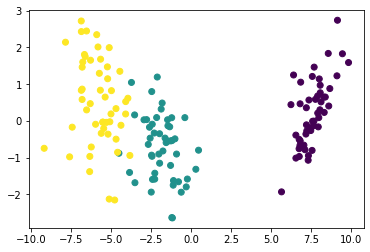

In [21]:
plt.scatter(lda_data[:,0], lda_data[:,1], c=df['target'])

### SVD
* Singular Value Decomposition
* 특잇값 분해기법
* PCA와 유사

In [22]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=2)
svd_data = svd.fit_transform(df.drop('target',1))
svd_data

array([[ 5.91274714e+00,  2.30203322e+00],
       [ 5.57248242e+00,  1.97182599e+00],
       [ 5.44697714e+00,  2.09520636e+00],
       [ 5.43645948e+00,  1.87038151e+00],
       [ 5.87564494e+00,  2.32829018e+00],
       [ 6.47759822e+00,  2.32464996e+00],
       [ 5.51597520e+00,  2.07090423e+00],
       [ 5.85092859e+00,  2.14807482e+00],
       [ 5.15891972e+00,  1.77506408e+00],
       [ 5.64500117e+00,  1.99000106e+00],
       [ 6.26539771e+00,  2.42576813e+00],
       [ 5.75200785e+00,  2.02037338e+00],
       [ 5.48058085e+00,  1.97777558e+00],
       [ 4.95112411e+00,  2.04828749e+00],
       [ 6.52596417e+00,  2.91606081e+00],
       [ 6.79037199e+00,  2.82500759e+00],
       [ 6.27239468e+00,  2.60811578e+00],
       [ 5.92953789e+00,  2.26766614e+00],
       [ 6.64813130e+00,  2.38959506e+00],
       [ 6.09486463e+00,  2.36082303e+00],
       [ 6.25397363e+00,  2.12001187e+00],
       [ 6.07364677e+00,  2.27178150e+00],
       [ 5.36999813e+00,  2.49808604e+00],
       [ 6.

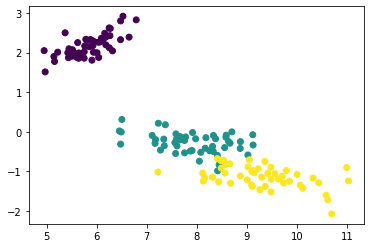

In [23]:
plt.scatter(svd_data[:,0], svd_data[:,1], c=df['target'])

### 군집화(Clustering)

#### K-Means Clustering
* 군집화 알고리즘 중 대표적, 대중적인 알고리즘
* 중심점(centroid)을 기준으로 가장 가까운 포인트들을 선택하는 기법
* 단점 : 사용자가 직접 중심점의 갯수를 지정, 원형의 분포인 경우에서만 잘 맞음

In [35]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans_data = kmeans.fit_transform(df.drop('target',1))

In [36]:
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [30]:
df['target']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

### DBSCAN
* Density Based Spatial Clustering of Applications with Noise
* 밀도가 높은 부분을 기준으로 클러스터링하는 방식
* Noise(Outlier)도 찾아줌
* n_cluster 갯수를 지정할 필요 없음
* 특이한 모양의 클러스터링도 잘 분류해줌
* 파라미터
    * epsilon : 거리
    * min_samples : 최소 샘플갯수

In [37]:
from sklearn.cluster import DBSCAN

In [40]:
dbscan = DBSCAN(eps=0.3, min_samples=3)
dbscan_data = dbscan.fit_predict(df.drop('target',1))
dbscan_data

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  1,
       -1,  1,  4,  2, -1, -1, -1,  2, -1, -1, -1, -1,  3, -1,  2, -1,  4,
       -1,  4,  5, -1, -1,  3,  2,  2, -1, -1,  3, -1,  4,  4,  4, -1, -1,
       -1,  1, -1,  4,  4,  4,  3,  4, -1,  4,  4,  4,  2, -1,  4, -1,  6,
       -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1,  7, -1, -1,
       -1,  8, -1, -1,  5,  8, -1,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  7,  5, -1,  8, -1,  6,  8,  8, -1,  5, -1, -1,  5],
      dtype=int64)

In [41]:
dbscan.labels_

array([ 0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0, -1,  0, -1,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1,
        0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  1,
       -1,  1,  4,  2, -1, -1, -1,  2, -1, -1, -1, -1,  3, -1,  2, -1,  4,
       -1,  4,  5, -1, -1,  3,  2,  2, -1, -1,  3, -1,  4,  4,  4, -1, -1,
       -1,  1, -1,  4,  4,  4,  3,  4, -1,  4,  4,  4,  2, -1,  4, -1,  6,
       -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1,  6, -1, -1,  7, -1, -1,
       -1,  8, -1, -1,  5,  8, -1,  5,  5, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  7,  5, -1,  8, -1,  6,  8,  8, -1,  5, -1, -1,  5],
      dtype=int64)

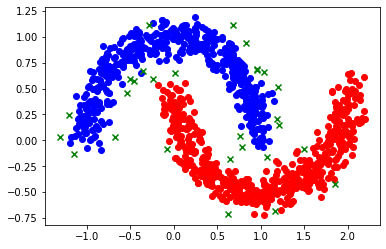

In [44]:
# 초승달 모양의 분포를 가지는 데이터로 DBSCAN 클러스터링
from sklearn.datasets import make_moons
np.random.seed(2)

x,y = make_moons(n_samples=1000, noise=.1)

dbscan = DBSCAN(eps=0.1)
pred = dbscan.fit_predict(x)

plt.scatter(x[dbscan.labels_==0, 0], x[dbscan.labels_==0, 1], 
            marker='o', facecolor='b')
plt.scatter(x[dbscan.labels_==1, 0], x[dbscan.labels_==1, 1], 
            marker='o', facecolor='r')
plt.scatter(x[dbscan.labels_==-1, 0], x[dbscan.labels_==-1, 1], 
            marker='x', facecolor='g')
plt.show()

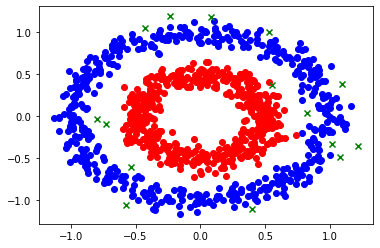

In [47]:
# 중첩 원모양의 분포를 가지는 데이터로 DBSCAN 클러스터링
from sklearn.datasets import make_circles
np.random.seed(2)

x,y = make_circles(n_samples=1000, factor=.5, noise=.08)

dbscan = DBSCAN(eps=0.1)
pred = dbscan.fit_predict(x)

plt.scatter(x[dbscan.labels_==0, 0], x[dbscan.labels_==0, 1], 
            marker='o', facecolor='b')
plt.scatter(x[dbscan.labels_==1, 0], x[dbscan.labels_==1, 1], 
            marker='o', facecolor='r')
plt.scatter(x[dbscan.labels_==-1, 0], x[dbscan.labels_==-1, 1], 
            marker='x', facecolor='g')
plt.show()

### 군집화 평가
* 실루엣 스코어
* 1 : 클러스터링 품질이 좋다
* 0 : 품질이 안좋다(의미 없음)
* 음수 : 잘못분류
* 클러스터링의 품질을 수치화해서 정량적으로 평가해주는 지표

In [51]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [49]:
silhouette_score(df.drop('target',1), kmeans.labels_)

0.5528190123564091

In [ ]:
# 소스 복사 주소
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

For n_clusters = 2 The average silhouette_score is : 0.7056703225102109
For n_clusters = 3 The average silhouette_score is : 0.597676421954799
For n_clusters = 4 The average silhouette_score is : 0.5591106064519759
For n_clusters = 5 The average silhouette_score is : 0.5509643081299264
For n_clusters = 6 The average silhouette_score is : 0.4459451820293749


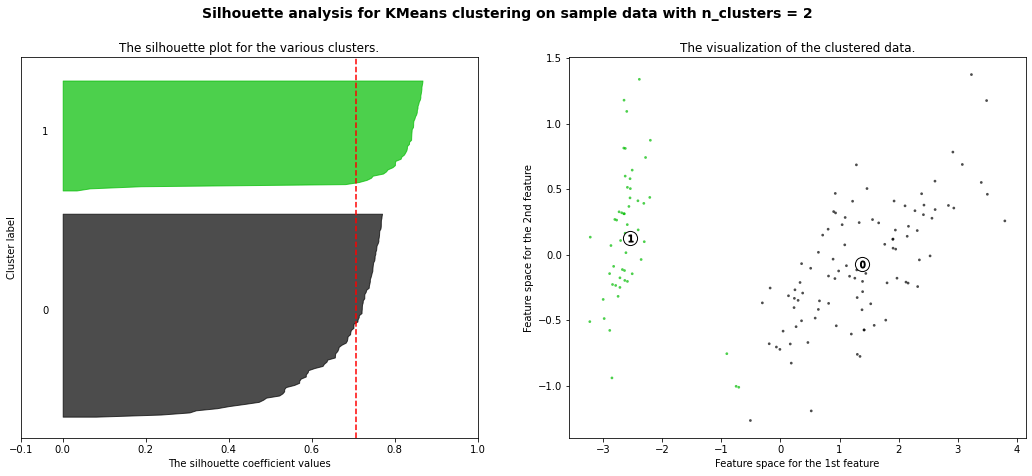

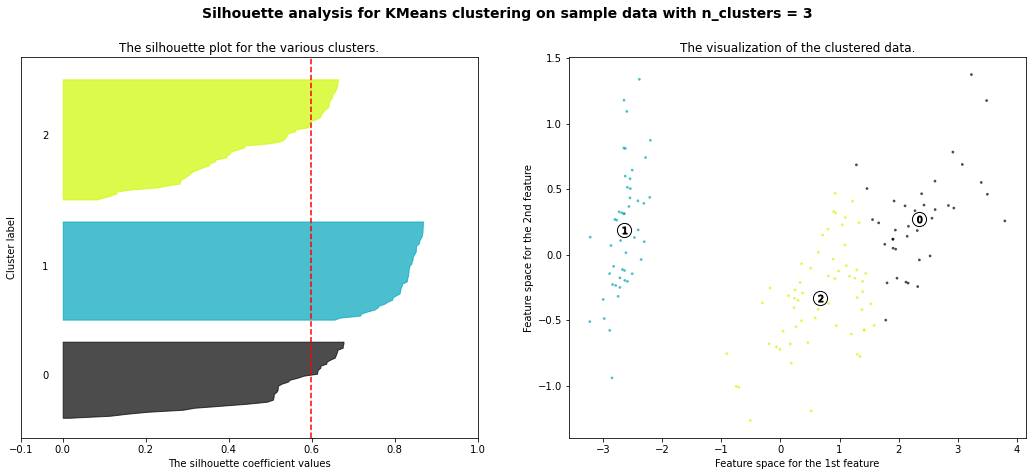

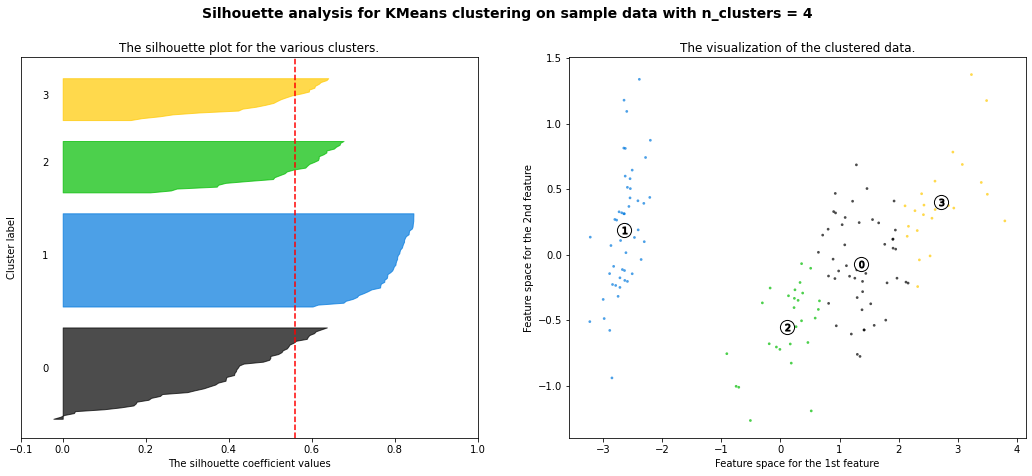

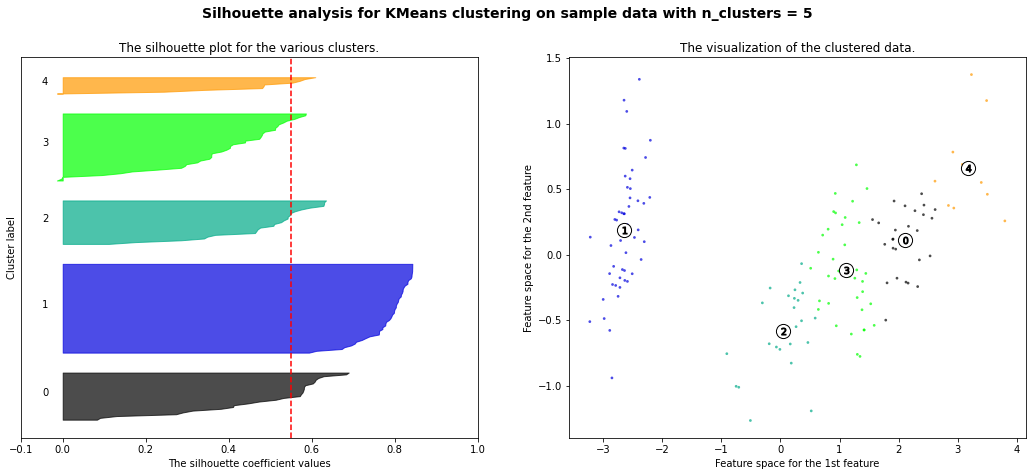

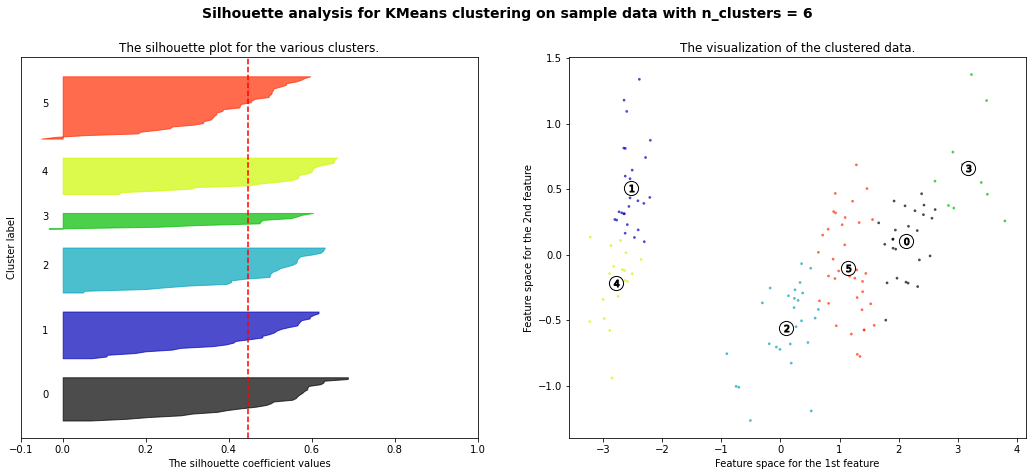

In [54]:
range_n_clusters = [2, 3, 4, 5, 6]
X = pca_data
import matplotlib.cm as cm

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()